In [1]:
import matplotlib.pyplot as plt
import json

In [10]:
bm25_optimal_nostem = !tools/eval/trec_eval.9.0.4/trec_eval -m recall.1000 -m map -m P.30 src/main/resources/topics-and-qrels/qrels.adhoc.51-100.txt runs_automatic_optimalv3_nostem/run.disk12.51-100.optimal.0.bm25.txt -q

bm25s_optimal_nostem = !tools/eval/trec_eval.9.0.4/trec_eval -m recall.1000 -m map -m P.30 src/main/resources/topics-and-qrels/qrels.adhoc.51-100.txt runs_automatic_optimalv3_nostem/run.disk12.51-100.optimal.1.bm25s.txt -q 

# bm25 0.1650 0.4087 0.4227
# bm25s 0.1915 0.4327 0.4253

# TODO
# same but over baseline bm25 (R_1000 is the same? using map)

In [17]:
def extract_from_raw(output):
    per_query = {}
    for line in output:
        measure,query_id,score = line.split()
        if query_id == "all": continue
        if measure == "map":
            per_query[query_id] = float(score)
    return per_query

bm25s_scores = extract_from_raw(bm25s_optimal_nostem)
bm25_scores = extract_from_raw(bm25_optimal_nostem)

<BarContainer object of 50 artists>

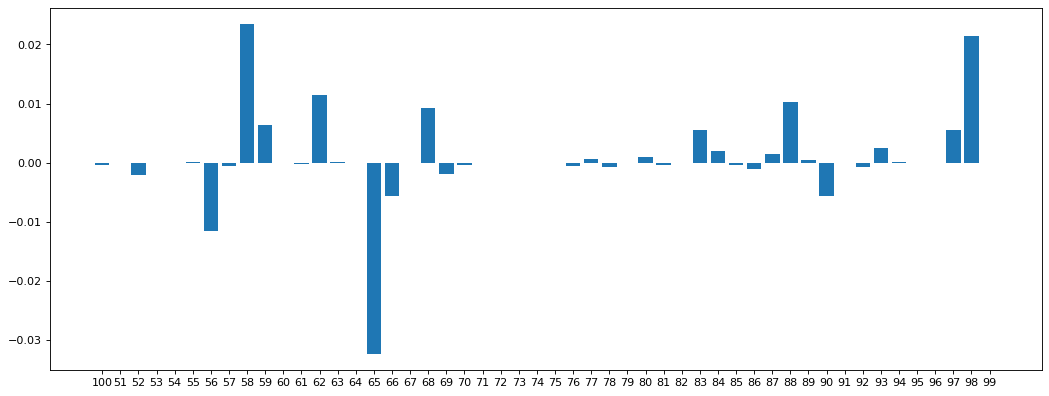

In [18]:
# positive: bm25s improvement
difference = {x: bm25s_scores[x] - bm25_scores[x] for x in bm25s_scores}
plt.figure(figsize=(16, 6), dpi=80)
plt.bar(list(difference.keys()), list(difference.values()))

In [9]:
exp_terms = json.load(open("expanded_queries/optimal_v3.51-100.json", "r"))
exp_terms["61"]
    

{'israeli': {'israelis': 0.9199905395507812,
  'israel': 0.8885443210601807,
  'palestinian': 0.8115027546882629,
  'palestinians': 0.7595594525337219,
  'gaza': 0.7283717393875122},
 'role': {'leaders': 0.5472498536109924},
 'in': {},
 'iran': {'iranian': 0.8271468877792358,
  'israel': 0.7230474948883057,
  'lebanon': 0.622096061706543,
  'israelis': 0.5517284274101257,
  'arab': 0.5348331332206726},
 'contra': {},
 'affair': {}}

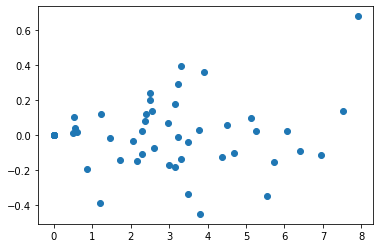

In [8]:
# correlation measures

# prop_represented:: number of terms with at least one expansion term
# exp_total_weight: total weight added by expansion terms
# num_exp_terms: total number of expansion terms added
# length: length of query 

query_stats = {}
for query_id in exp_terms:
    query_stats[query_id] = {
        "length": len(exp_terms[query_id]), 
        "num_exp_terms": sum([len(exp_terms[query_id][x]) for x in exp_terms[query_id]]),
        "difference": difference[query_id],
        "exp_total_weight": sum([sum([exp_terms[query_id][x][exp_term] for exp_term in exp_terms[query_id][x]]) for x in exp_terms[query_id]]),
        "prop_represented": sum([1 for x in exp_terms[query_id] if len(exp_terms[query_id][x]) > 0]) / len(exp_terms[query_id]) 
    }

plt.scatter([query_stats[x]["exp_total_weight"] for x in query_stats], [query_stats[x]["difference"] for x in query_stats])